


## Content

-  Geometric intuition SVM 

- Hard Margin SVM

- Soft Margin SVM 

- Algebric Intuition 
 
- Hinge loss 
 - geometric intuition of hinge loss
 - Algebric intuition of hinge loss

- Comparison with other loss

- SVM imbalance 

- Code implementation of Linear SVM on Spam Data


### Imagine you are Data Scientist at Google

You are working on **Spam Classification model** to classify Emails as Spam or Ham



# SVM
- Popular in 2000's ( late 90s )
- Kernel's SVM 
- Theoritically they are awesome. (but in practice better algorithms exists)
- less frequent used now a days
- Very challenging Maths.

# **Geometric intution behind SVM**



Lets understand the geometric intuition behind SVM through a simple example

Supposedly we have a few +ve class datapoints and a few -ve class datapoints
- Now we have two hyperplanes $\pi_1$ and $\pi_2$


#### though both the hyperplanes $\pi_1$ and $\pi_2$ separates  the data into two distinct classes , which one better generalizes on the data ?

- Intuitively, we can say hyperplane $\pi_2$ does a better generalization on the data

#### But how can we say $\pi_2$ generalizes better on the data ?
- if we look at the hyperplane $\pi_1$
- if we draw two hyperplanes parallel to $\pi_1$ from the closest +ve datapoint and -ve datapoint to $\pi_1$
- we can see the gap or Margin between these two parallel drawn hyperplane

Note: This Margin_1 is respective to hyperplane $\pi_1$


- if we look at the hyperplane $\pi_2$
- and draw the two hyperplanes parallel to $\pi_2$ from the closest +ve datapoint and -ve datapoint to $\pi_1$
- we can see the gap or Margin between these two parallel drawn hyperplane( Margin_2) is much larger than Margin_1

- Giving us the idea that we pick that hyperplane $\pi$ that results in Largest Margin

#### Why need Margin to be large ?
- Intuitively . the larger the margin, the farther away the groups of datapoints are from one another which makes classification task much easy.


Note: All Distance from datapoints are measured perpendicular to any Hyperplane $\pi$
- so we want the all the +ve and -ve datapoints to be as far as possible from the Hyperplane in order for it to generalize better on the data.

Such classifiers which want the margin to be as large as possible is called Margin-maximising classifiers.

![](https://drive.google.com/uc?export=view&id=1xU6TygVDQErHVIzU7hxJ0O_Sx54YWYHd)


#### **Let's summarize everything**
- We have some bunch of + ve and - ve points
- Let's say $\pi$ is margin maximizing hyperplanes,
- $\pi^+$ is the positive hyerplane parallel to $\pi$ and touching the closest postive points to the $\pi$
- $\pi^-$ is the positive hyerplane  parallel to $\pi$ and touching the closest negative points to the $\pi$
- d is margin i.e, distance between  $\pi^+$ and  $\pi^-$ such that we want this margin to be as large as possible.


![](https://drive.google.com/uc?export=view&id=1a80_hlyYgeIO4IGdkOnmy2DmYlp2Eic2)


Now if we recall from Regression models, we define a Hyperplane $\pi$ as $w^Tx+b = 0 $
Now lets assume that the parallel hyperplanes ($\pi^+$ and $\pi^-$) are defined as:
- $w^Tx+b = 1 $
- $w^Tx+b = -1 $

#### Then what will be the length of the margin if $||w|| \neq 1$ ?
- recall from linear algebra lecture, we can define the Margin = $\frac{2}{||w||}$

#### Question: If data is in spiral shape, is the hyperplane suppose to be a straight line ?
- No, We will be using a different variation of hyperplane
- but for now we are seeing a simplest case where data is linearly separable

 <img src='https://drive.google.com/uc?id=1lFpXDwSeBZ1haEmLePCpf-q3S-yE2JIx'/> 


### **How did we define margin = $\frac{2}{||w||}$ ?**
- we defined our hyperplane $\pi^+$ and $\pi^-$ as
- $w^Tx+b = 1 $
- $w^Tx+b = -1 $

Now if we rearrange these equations we get,
- $w^Tx+b -1 = 0 $
- $w^Tx+b+1 = 0 $

if we see from the origin,

- the distance of hyperplane $\pi^+$ can be defined as
  - $\frac{b-1}{||w||}$

- the distance of hyperplane $\pi^-$ can be defined as
  - $\frac{b+1}{||w||}$

Hence the distance between the two hyperplanes will be the difference between $\frac{b+1}{||w||}$ and $\frac{b-1}{||w||}$ :
- $d( \pi^+,\pi^-) = \frac{2}{||w||}$

<img src='https://drive.google.com/uc?id=1RspiVk65K543NhaxLIdLSM6Wdr2b9LLx'/>

#### ***Question***: we know that we want to maximize the margin or $\frac{2}{||w||}$, so what will be the parameters for the margin ?
---
- Weight (w) and constant (b)

## **Now what if we defined $\pi^+$ as $w^Tx+b = k $ and $\pi^-$ as $w^Tx+b = -k $ , will the margin change ?**

Lets understand this with an example
- Supposedly we take $ k = 10 $
- So we intuitively want the separating hyperplane ($\pi$) to be mid way between the positive datapoint hyperplane ($\pi^+$) and negative datapoint hyperplane ($\pi^-$) so as to have a better generalization
- Now $\pi^+ : w^Tx+b = 10 $ and $\pi^-: w^Tx+b = -10$
- Hence with the same concept of putting everything to LHS, we get our margin as :
  - $\frac{b+10}{||w||} - \frac{b-10}{||w||} = \frac{20}{||w||} $
- Now we will maximize this margin on weight (w) and constant (b)


Note: Since, the margin does not change if we take +1,-1 or k,-k ,
- Hence for mathematical simplicity, We take +1, -1
- Also +1, -1 corresponds to classes





<img src='https://drive.google.com/uc?id=1QLs3YEbAosO4wvZNTdDpsmOxmeVdlbKX'/>

# **Hard Margin SVM**

Suppose we have some +ve datapoints and -ve datapoints with hyperplane $\pi$ which separates them, and we have $\pi^+$ and $\pi^-$ as our parallel hyperplane
- we see the setting of the example is a classification problem where we have n samples, where each sample contains some features x and a class label y which can take value +1 or -1

Our aim is to maximize the margin , so how can we perform optimization here ?
- lets look into our example to understand this
What will be the value of the +ve datapoint which lies on the hyperplane $\pi^+$ ?
- 1 , since $\pi^+: w^Tx+b=1$

Now what will be the value of the +ve datapoints which lie beyond the hyperplane $\pi^+$ ?
- will have value greater than 1 , hence $\pi^+: w^Tx+b > 1$

Similarly, what will be the value of the -ve datapoints which lie beyond the hyperplane $\pi^-$ ?
- will have value less than -1 , hence $\pi^+: w^Tx+b < -1$
- so can we club both the cases and say,
- for all n samples, our $(w^Tx_i + b)y_i \geq 1 $

How does $(w^Tx_i + b)y_i \geq 1 $ works for both +ve and -ve datapoints ?
- if we consider +ve datapoint,
- $y_i $ will be 1
- $(w^Tx_i + b)$ will be greater than equal to 1 , hence satisfied
- if we consider -ve datapoints
- - $y_i $ will be -1
- $(w^Tx_i + b)$ will be also negative since it will be less than equal to 1 , hence (-ve) multiplied by (-ve) makes positive , hence the equation is satisfied here too


- Now we can say , we maximize the margin such that for all n samples, our $(w^Tx_i + b)y_i \geq 1 $

What constraints does $(w^Tx_i + b)y_i \geq 1 $ puts ?
- all +ve datapoints should lie beyond $\pi^+$
- And all -ve datapoints should lie beyond $\pi^-$

Thus due to such constraints, it makes the hyperplane to have zero errors since it does not want any datatpoint to belong to the wrong side of the parallel hyperplanes. This makes the model a Hard-Margin classifier.


Note: this selecting the best hyperplane for the linear with maximizing margin along with n constraints is Linear SVM which is the simplest version of SVM model



<img src='https://drive.google.com/uc?id=1D0eSCz9S3dsfhn2XEhd2K0zoMUQmzQt0'/> 


## **Question: When would Linear SVM with Hard Margin fails?** 


- When Data is non-linear separable and data has some outliers

Note: hard Margin classifers rarely work in real world problems



<img src='https://drive.google.com/uc?id=1XIIrNFbjwEavFnDdrzGvraiCrE9Hh1jw'/> 


What if we had a +ve datapoint $x_1$ which is 0.5 units in between $\pi^+$ and $\pi$, what will be the value of $(w^Tx_i+b)y_i $ ?
- $(w^Tx_i+b)y_i = 1-0.5$ , since the distance from $\pi$ to $\pi^+$ is 1 , and the distance between $\pi^+$ to $x_1$ is 0.5.
- lets call this 0.5 as $ \zeta_1 $

what will be the value of $(w^Tx_i+b)y_i $ if we have a +ve datapoint $x_2$ between $\pi$ and $\pi^-$ such that it is 1.5 units away from $\pi^+$?
- $(w^Tx_i+b)y_i = 1-1.5$ , since we want $x_2$ to be beyond $\pi^+$, hence considering $\pi^+$ for finding the distance
- therefore, the distance from $\pi$ to $\pi^+$ is 1 , and the distance between $\pi^+$ to $x_2$ is 1+ 0.5

- lets call this 1.5 as $ \zeta_2 $
- Also notice how $x_2$ will be misclassifed as a negative datapoint

what will be the value of $(w^Tx_i+b)y_i $ if we have a +ve datapoint $x_3$ beyond $\pi^-$ at a distance of 2.5 from $\pi^+$?

- $(w^Tx_i+b)y_i = 1-2.5$
- Calling this 2.5 as $ \zeta_3 $





<img src='https://drive.google.com/uc?id=1gZj9ZemwWxWa6A8QEsblTrOszW9rEaIg'/> 


Now in a hard-Margin Classifier,
if we have a +ve datapoint which is beyond the $\pi^+$, then what will the $\zeta$ be ?
- 0 , this means $\zeta_i = 0$ for correctly placed data points

hence we can say if $\zeta$ is > 0, the datapoint is incorrectly placed

Now if $0<\zeta<1$, as seen in $x_1$ will the hyperplane $\pi$ misclassify ?
- No , since the point lies above the $\pi$, $x_1$ will still be classified correctly

Now will datapoints $x_2$ and $x_3$ be classified correctly by $\pi$ ?
- No, thus showing if $zeta>1$ the model will incorrectly classify the datapoint


<img src='https://drive.google.com/uc?id=1ZDVI2XzRPjBlB9PG6bbE9q1RkV9kKpii'/> </td>

# **Soft Margin SVM**

Question: What if data is not perfectly linearly seperable ? it's not non-linear but can not be seperated perfectly

Imagine some data like this, where some data points are on the wrong side

Note: such data is also referred as **almost linear seperable**

#### How to account for these data point ?

This case is often referred as Soft-margin SVM 

#### Why Soft-margin ?
- because margin is not perfect
- there are some points with $ \zeta_i > 0 $

If we recall optimization problem
- $ max \ \frac{2}{||w||} $ with some $ \zeta_i's $

Can we think of another way to write this ?

- $ min \ \frac{||w||}{2} $ with some $ \zeta_i's $

Aren't both equation mean same thing ?

We will use this minimization optimization to compare SVM with different other models



<img src='https://drive.google.com/uc?id=1oGFEoy2iJzt1eZpXBUNkOOwCsYjtLvES'/>

#### Question: If we recall, what will be the value of $ y_i(w^Tx_i + b) $ if a data point is perfectly classified and perfectly placed. ?

- if we recall,  $ y_i(w^Tx_i + b) >= 1 $ 

####  Question:  What will be the value of $ y_i(w^Tx_i + b) $ if a data point is not perfectly placed or classified where $ \zeta_i > 0 $?
-  $ y_i(w^Tx_i + b) >= 1 -  \zeta_i $  

#### what do you think our goal is here ?

- We want to maximize margin 
- along with that we want each data point to be appropriately place

so what we can add in our optimization problem to satisfy our goal ?

- As we want to minimize data points having $ \zeta_i > 0$,

- so we should minimize $ \zeta_i's $, as it is like an error 


Now with the introduction of $ \zeta $,  the final function will change to <br>

- $ min_{w,b} \ \frac{||w||}{2} + \frac{C}{N} \sum_{i=1}^N \zeta_i$

- such that $(w^Tx_i+b)y_i >= 1 - \zeta_i$ for all i : 1-> n
-  $ \zeta_i >= 0 $.

if we recall the regularization, we have a hyperparameter $ \lambda$ , similarly we have a hyperparameter C and we want to minimize the $\zeta_i$ for all n samples

#### What's the use of C here ?
- C controls whether to focus on maximizing margin or,
- minimizig the errors $ \zeta_i's $

To summarize, we want to find (w,b) which maximize the margin, along with aim to minimze  $ \zeta_i \$  errors because of points not lying on their appropriated places.

Note: This is also called as **SVM with soft margin** which we use when we almost linearly seperable data

<img src='https://drive.google.com/uc?id=1VzX7daT4w5JUViQiJS2V7H6X5Y00p20c'/>

## **Question: Does this equation $(w^Tx_i+b)y_i >= 1 - \zeta_i$ holds true for negative points as well ?**

Yes, to understand say we have three hyperplanes
- $ \pi = w^tx+b = 0 $
- $ \pi^+ = w^tx+b = 1 $
- $ \pi^- = w^tx+b = -1 $

Now imagine some negative data points

Say  $ \ x_1 $ is negative labelled point and 0.5 distance in between $ \pi \ and \ \pi^- $

#### What will be the value of $ y_i(w^tx_i+b) $ for it ?

  - $\ y_i(w^Tx_i+b)$ = 0.5 = 1 - 0.5, 
  
here 

 - $ \ y_i $ is -ve and $(w^Tx_i+b)$ also -ve 
 
 - so product will be postive.

#### What will be the value of $ y_i(w^tx_i+b) $ for $ x_2 $ which is at 2.5 unit distance from $ \pi^- $ in opposite space ?

  - $\ y_i(w^Tx_i+b)$ will be -1.5 = 1 - 2.5   where 2.5 is $ \zeta_i $
  
here again
-  $ \ y_i $ is -ve but $(w^Tx_i+b)$ is +ve 
- so product -ve


#### Question : why take $ y_i $ as +1 and -1 and not +1 and 0 ?
- We could have considered y_i as 0 and 1 but the maths behind these Soft-margin and Hard-Margin will become too overwelming 
- Hence we used +1 and -1 instead


<img src='https://drive.google.com/uc?id=1BpQLbfnLK-MHtEVkGkh1H_o5g8V7r63f'/> 



---
---
---



# **Algebric Intuition**


Recall we use Optimization to minimize the loss or error of the model

Example1: In Logistic Regression, the optimization use to minimize   

- Logloss

- And have a Regularization parameter (λ)  which controls the Regularization 


Example2: In Linear Regression, the optimization use to minimize   

- Squared loss 

- And also have a Regularization parameter (λ)  which controls the Regularization as discussed in Logistic Regression 

<br>

### **Now for Soft-Margin Linear SVM, what will be the error ?**
 We see Soft-Margin SVMs are defined as:
  - min<sub>(w,b)</sub> $\frac{||w||}{2}$ + $C\frac{1}{N}$$\sum_{i=1}^N \zeta_i$

  - Such that $ y_i(w^tx_i + b ) \geq 1 - \zeta_i and\  \zeta_i \geq 0 $ for all n datapoints

<br>

if we look closely, the term $\frac{1}{N}$$\sum_{i=1}^N \zeta_i$ 
- is nothing but the error which we try to minimize
- Since $ζ_i$ will be non zero, for data points which are 
 - either inside the margin 
 - or are misclassified

**Note:** we call $\frac{1}{N}$$\sum_{i=1}^N \zeta_i$ as **Hinge Loss** 

<br>

if we now look at the term $\frac{||w||}{2}$, it is quiet similar to L2-Regularization 
- Though $\frac{||w||}{2}$ is used in order to have maximum Margin (Gemotrically),
- Algebraically, $\frac{||w||}{2}$ is just $\frac{1}{2}$ of L2-Regularization

<br>

Recall how C was a hyperparameter that was used to have tradeoff between 
 - maximizing the margin  
 - minimizing the error ($ζ_i$)

Hence we can say C becomes Analogous to our Regularization Hyperparameter (λ)


Therefore we can interpret our Soft-Margin SVM as   
 - $C$ HingeLoss $+\frac{1}{2}$ L2Reg 

**Note:** $\frac{1}{2}$ L2Reg can also be called as Margin Regularization 

<br>

#### **Question:** What will happen if C is a large value  ? 

Suppose we take C as $10^{10}$

Then the $\frac{||w||}{2}$ 
- would be a very small value 
- as compared to the HingeLoss

Hence more importance will be given to the HingeLoss 

this means that
- model will try to keep the HingeLoss as small as possible 
- which will cause the model to have minimum loss even for outliers  

Hence the **model will overfit** 


 <img src='https://drive.google.com/uc?id=15g-jYm6tuM7Bq9c6BPjhR8Dhdi19zlxu'/>

Now suppose we take C = 0 

### **What will happen with such a small value of C ?**

This will make the model to have maximizied Margin 

<br>

### What do we mean by maximizied Margin ?

Imagine we have bunch of positive and negative data points

Now since, we want to have Margin as large as possible, 

- we will make the hyperplanes $Π^+$ and $Π^-$ as far away as possible

- Even though we have errors ($ζ_i$) 

This means the performance of the model on the training dataset will reduce, 
- causing **the model to Underfit** 

<img src='https://drive.google.com/uc?id=1qGn6RnzM9FNjzF842t8otRBmxV6GmYrn'/>

## **Question: How are we classifying a datapoint when Margin is so large ?**

Recall we define, our hyperplane as $w^Tx+b = 0$

Now for after optimization, we got 
- w* and b* as the optimized values

if we have a query point $x_q$, 
- then we just use the hyperplane $Π$, to find
 - ${w^*}^T x_q + b^* $

And classify $x_q$ as:
- +ve datapoint if ${w^*}^T x_q + b^* >0$, 
- else we say $x_q$ is a -ve datapoint

<br>

**Note:** As seen Hard-Margin SVM model works when: 
- we have a perfectly Linear separable data
- Which means there is no error 

- hence model only focuses on maximizing the margin


but since data is not completely linearly seperable:
- we counter the misclassifed and inside the margin datapoints using the error ($ζ_i$) 
<br>


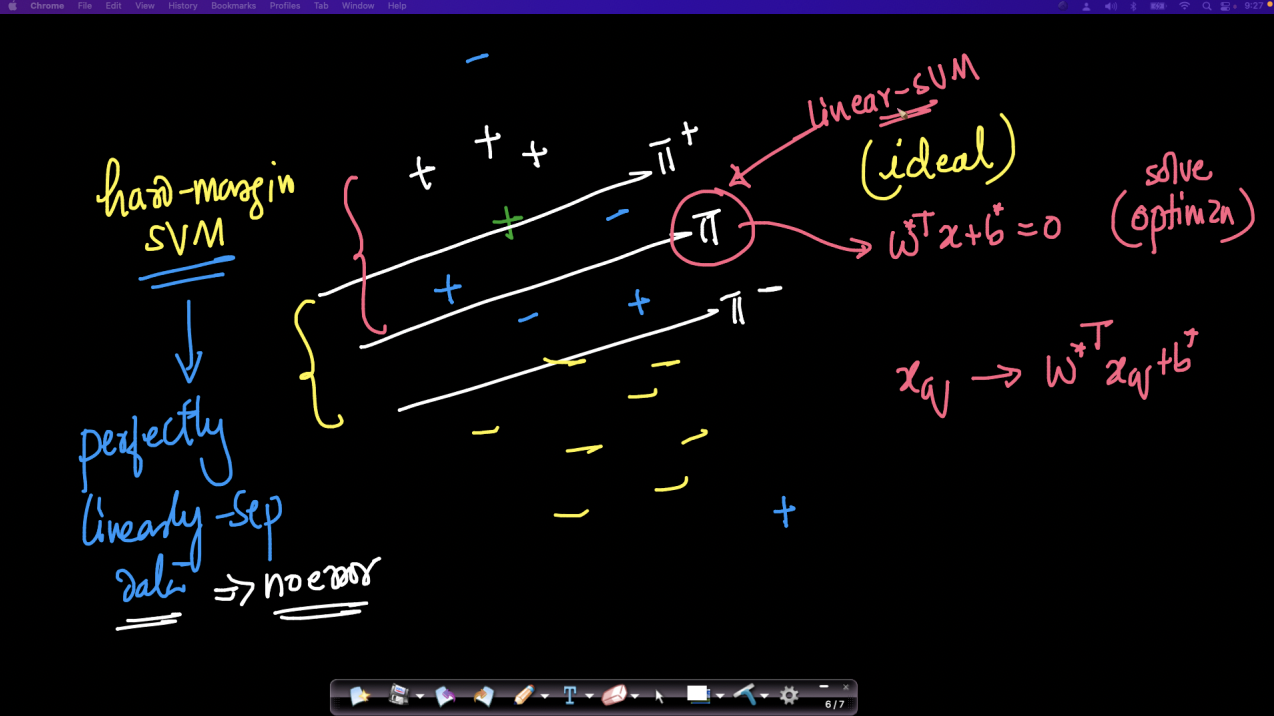

## **Question: Now since we use hyperplane $Π$, then why do we need $\pi^+$ and $\pi^-$ ?**

As discussed, there can be infinte number of hyperplanes that can classify the data 

But, in order to decide the best hyperplane $Π$ 

- which generalizes the data

- we use the Maximizing Margin approach

Hence we find $\pi^+$ and $\pi^-$

**Note:** SVMs are margin maximizing models

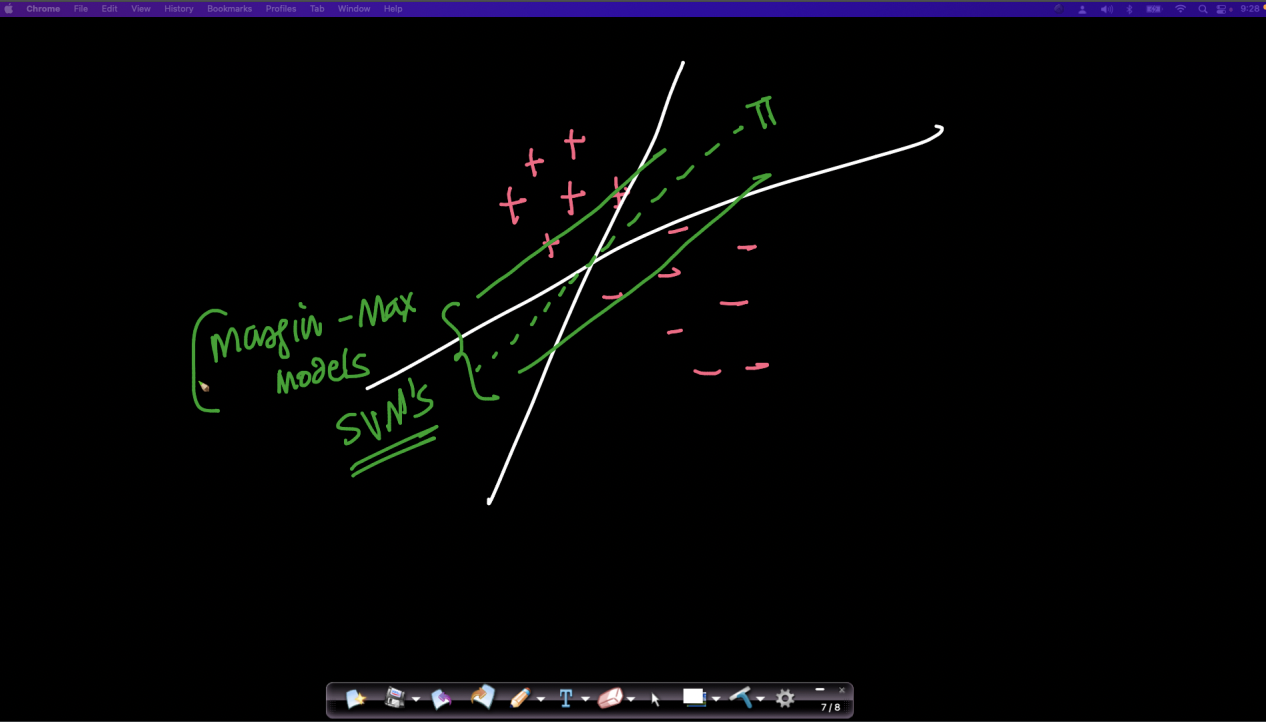

**Observe** 

we do not check the constraints $y_i(w^Tx_i+b)\geq 1$ when minimizing the loss function

<br>

## **Question:  How can we incoporate these constraints in optimization ?** 


Recall we used **Lagrange multipliers** in PCA. 

- And how it can be used in any 
constraint optimization problem 

Thus making the constraints part of the loss function 

<br>

**Note:** After adding constraints into the loss function, 
- we can use Optimization algorithm like Gradient Descent to find the global minima



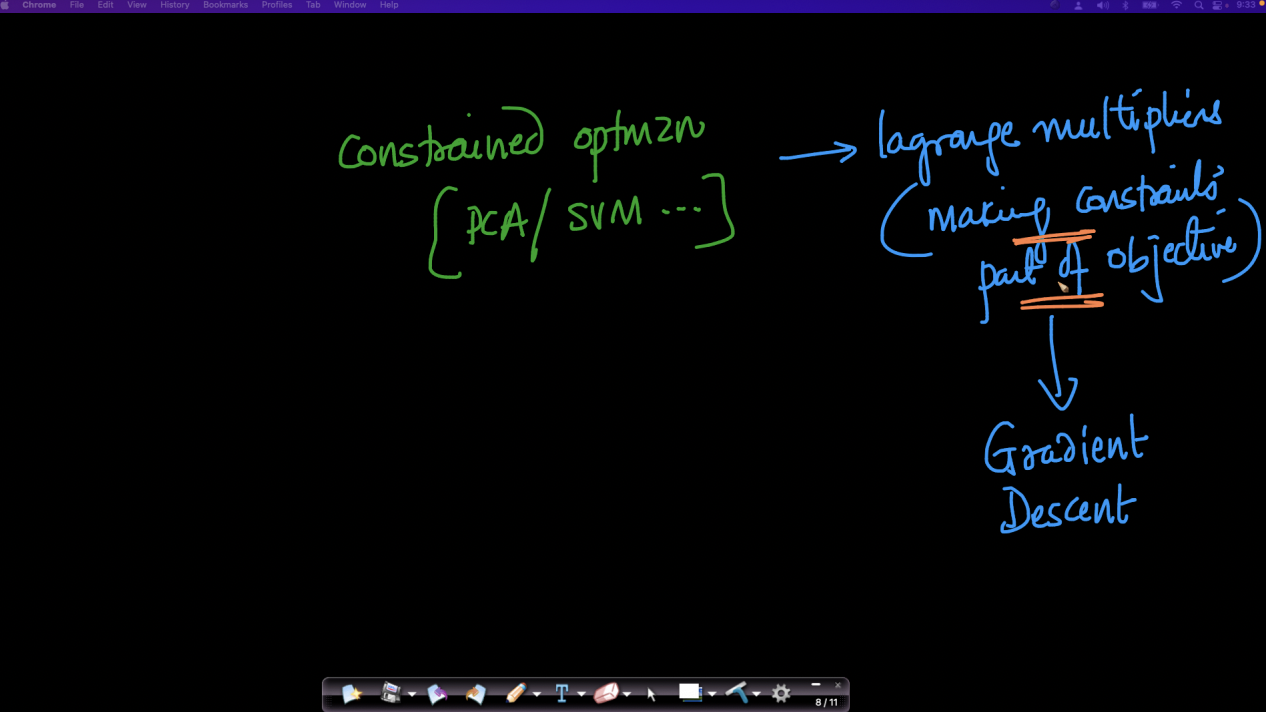

#### **Question:** How will the loss function look after adding constraints ?

Recall that, SVMs have n constraints, 
- this means for each constraint,we will have a Lagrange Multiplier (λ)

 - Thus causing us to have n Lagrange Multiplier {$λ_1$,$λ_2$,$λ_3$....,$λ_n$} 
<br>

Therefore the final loss function $L(w,b)$ becomes:
 - ${Min}_{w,b} \frac{||w||}{2} + C \frac{1}{n} ∑_{i=1}^{n} ζ_i + λ_1 {(Constraint \ 1)}... + λ_n {(Constraint \ n)}  $ 

<br>

**Note:** We find the global minima using Gradient-Descent, 
- though we have another specialized Optimization Algorithm
 -(SMO) which we will learn later


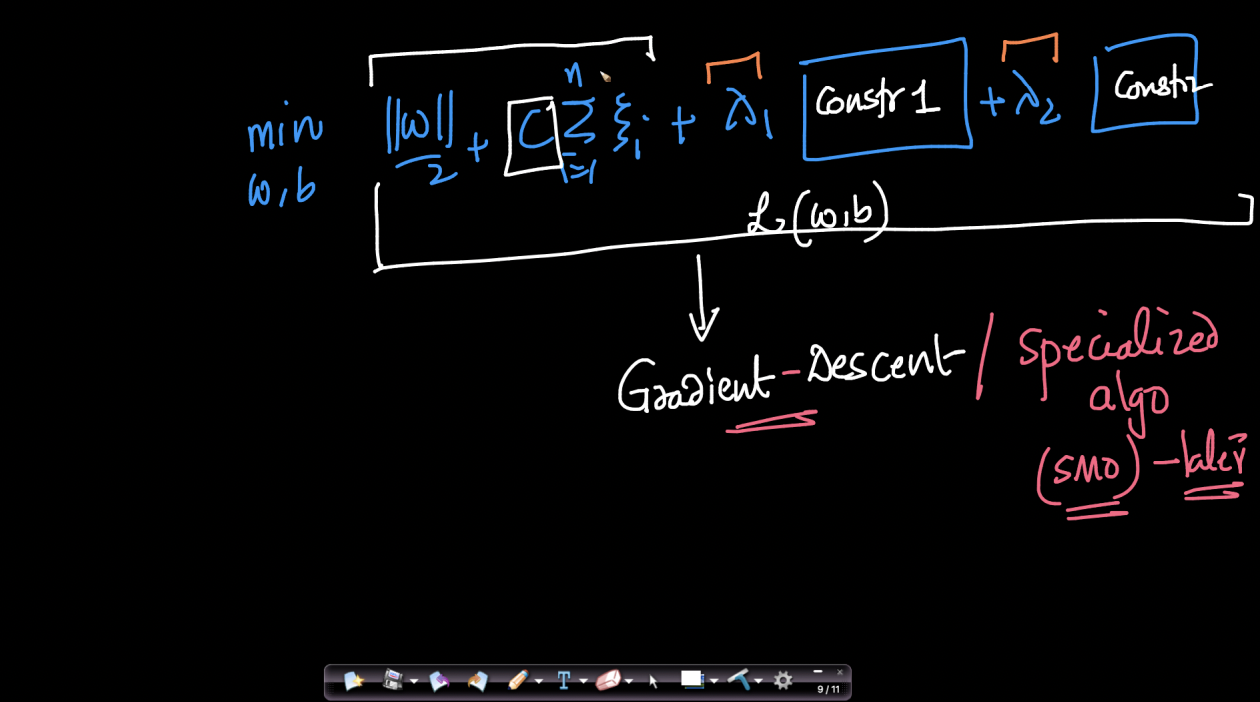

#### **Question:** Does adding constraint to the loss function will make it not convex ?

The loss function for SVM is a convex function because of the term 
- $\frac{||w||}{2} + C \frac{1}{n} ∑_{i=1}^{n} ζ_i$

The constraints do not play any role to define the convexity of the loss function

<br>

**Note:** Deep Learning algorithms can have non convex loss function
- and they still be able to provide SOTA results

Though we have hacks and algorithms to 
- counter these non-convex loss function


<img width=80% src='https://drive.google.com/uc?id=1uAy6dVGwBi6J_BaDGWQUjoq6J58ExNJL'/>

# **Geometric intuition of Hinge Loss**

#### How will the plot of hinge loss look like?

lets say 

- we define $f(x_i)$ as the best hyperplane $\pi: w^Tx+b$

- And assume our x-axis to be:
 - $z_i = y_if(x_i)$ 

<br>

#### Now if we plot Hingeloss for a +ve datapoint that lies on or beyond $\pi^+$, what will the $\zeta_i$ be ?

Ans: Zero , since the datapoint is correctly positioned 

<br>

#### what will be the value of $z_i$ for such a datapoint ?

Since $f(x_i)$ is defined as our best hyperplane $Π$ 
- and the distance between $Π$ and $Π^+$ is 1

Therefore the value of $f(x_i)$ will be > 1 
- Since the distance between the hyperplane $\pi$ and the datapoint (beyond $\pi^+$) will be >1

- Thus making $z_i > 1 $, since $f(x_i)>1$ cause $y_i = 1$ for a +ve datapoint

hence we can say, for +ve datapoint which lie on or beyond the $\pi^+$ ($z_i\geq 1$)
- will have hinge loss as 0


<br>
 
#### Similarly, for a -ve datapoint that lies beyond $\pi^-$, What will be $z_i$ ?

Since for a -ve datapoint, we have 
- $y_i = -1$

and the distance between the hyperplane $\pi$ and the datapoint (beyond $\pi^-$) will be >1 but weight vector is in oppsite direction so

- $f(x_i)<-1$

Therefore making $z_i = y_if(x_i)$ greater than 1

Hence for all the -ve datapoints which lie on or beyond the $\pi^-$ ($z_i\geq 1$)
- will also have hinge loss as 0

<br>


#### What about datapoint between $\pi^+$ and $\pi$?

Recall if we have a +ve datapoint which was 0.5 distance from $\pi^+$,

- The $f(x_i)$ becomes 0.5 since the datapoint is 0.5 distance from $Π$
- Thus making $z_i = (1) (0.5) = 0.5 $

#### What can we say about the error $ζ_i$ ?
 Ans: $\zeta_i$ becomes 0.5

<br>

#### What about a +ve datapoint on $\pi$?

Since our +ve datapoint lies on $\pi$,

- We can say $f(x_i) = w^Tx+b = 0$

- Thus making $z_i = (1) (0) = 0 $

#### What can we say about the error $ζ_i$ ?

Since our +ve datapoint is on $\pi$ ($w^Tx+b = 0$ )

- Thus we can say, the datapoint is at a distance of 1 from $\pi^+$,

 - which makes we can say $w^Tx+b = 0 = 1-1$

Therefore our $\zeta_i$ becomes 1

<br>

**Observe**
- when $z_i = 0.5$, hinge loss = 0.5
- and when $z_i = 1$, hinge loss = 1
  
Hence we can say, our hinge loss increases as the +ve datapoints are misclassified or $z_i$ decreases



- therefore we see a linear relation between $z_i$ and $ζ_i$

hence making a hinge like shape 

**Note:** Since we saw how there is a hinge-like shape in the plot, 
- we call the loss function as HingeLoss

<img width=80% src='https://drive.google.com/uc?id=1UY1HSMNJhwn4fgJTXK2F2Qy0KblzHS1Z'/><br>


# **Algebric intuition of HingeLoss**

if we recall from the soft margin SVM
- the constraint was $ y_i(w^Tx_i+b) >= 1-ζ_i$

And if we look closely,
- $y_i(w^Tx_i+b)$ is nothing but $z_i$

so we can write:
- $ z_i >= 1-ζ_i$ 

<br>

#### What are we minimizing in $ z_i >= 1-ζ_i$ ?

Ans: $ \zeta_i$

Hence the minimum value of $ z_i >= 1-ζ_i$ will be:

- $ z_i = 1-ζ_i $

placing  $ζ_i$ to RHS

- $ ζ_i = 1-z_i $





<img  src='https://drive.google.com/uc?id=1fvaq6xftQ347uXaq1oyEmQXGSxNpOfAN'/>

Recall how $ζ_i$ is zero for datapoints 
- which are correctly place on or beyond the hyperplanes of $\pi^+$ and $\pi^-$


Hence making,  $ \zeta_i $ to have values as  0 or $ 1 - z_i $ 

- therfore we can define $ζ_i$ as:
 > $ \zeta_i =  max ( 0 , 1 - z_i) $ 

<br>


#### Why take maximum of 0 and $1-z_i$ ?

if we consider a +ve datapoint, which is on or beyond $\pi^+$,

<br>

#### What will be the value of $ 1 - z_i $ ?

Since, $ z_i = (w^Tx_i+b)y_i $ will be > 1 as $(w^Tx_i+b)>1$

- $ ζ_i = 1 - z_i $ will be negative

<br>

But recall for such datapoints $ζ_i$ is zero,

- so to handle that case we took max of  0 and $1-z_i$


**Note:** 

$ \zeta_i =  max ( 0 , 1 - z_i) $ looks exactly like the curve we plotted between hingeLoss and $z_i$

<img  src='https://drive.google.com/uc?id=1AwJAQsYohyId06gifFOBriOy8pAE1_FF'/>

# **Comparison with other Losses** 

If we recall, for logistic Regression,

- we had some features ($x_i$) 
- corresponding to which we had our class labels as y = {0,1} 
- With the prediction of model ($y_î$) be sigmoid of $(w^Tx_i+b)$


Hence our logLoss function become:

>$ ∑_{i=1}^{n} y_i log(\hat y_i) + (1-y_i) log(1-\hat y_i) $



<br>

#### Now if we have class labels as $y_i$ = {+1, -1}, what will be loss function for logistic Regression ? 

The derivation for logLoss for $y_i$ = {+1, -1} is beyond the scope of this lecture, 

- the loss function for logisitic Regression model becomes:  
  - Loss : $ \sum_{i=1}^{n} log( 1 + e^{-y_i (w^Tx_i + b)} )$ ,

 
Now if we recall, for our SVM model, 
- $∑_{i=1}^{n}\zeta_i$ is our loss function


<font color='red'> Instructor Note <font>
- Reference link  on how log-likelihood changes 
- causing the loss function to change

-  https://stats.stackexchange.com/questions/134754/logistic-regression-with-1-1-labels

   




<img width=80% src='https://drive.google.com/uc?id=1jp1Qr-UyxsC06Nlmb2PHyJSmXW6LGI3k'>


Before we Compare the Logloss of Logistic Regression with HingeLoss when $y_i$ = {1,-1}, there is another loss:
- **0-1 loss** , which simply says that 
 -  the loss is 0 when the model classifies the datapoint correctly ($y_î = y_i$)  
 - the loss is 1 when the model misclassifies the datapoint ($y_î \neq y_i$)

<br>

#### Now if we have a datapoint which has $z_i=y_i(w^Tx_i+b)>0$, was the SVM model able to classify such a  datapoint correctly ?

Ans: Yes, we have seen this in the case of a +ve datapoint which was
- 0.5 distance in between the hyperplane $Π$ and $Π^+$ 

- Though there is a slight Hingeloss ($ζ_i$) involved for that datapoint but it was classified correctly by the SVM hyperplane $Π$


<br>


Hence we can say,
- 0-1 loss will be 0 when $ z_i > 0$ 
- and 0-1 loss will be 1 when $ z_i < 0$ 

**Note:** 0-1 loss does not care much of how much distance the datapoint is from the hyperplane $Π$, 
- it just cares for the datapoint to be classifed correctly or not 
- Hence not used much 

<br>


Recall how the LogLoss changed when $y_i$ = {1,-1}
- $ \sum log( 1 + e^{( -y_i (w^Tx_i + b))} )$ 

**Notice** in the exponential term of LogLoss $y_i(w^Tx_i+b)$ is just what the $z_i$ is 

<br>

Hence we can say,
- LogLoss = $ \sum log( 1 + e^{(-z)i))} )$ 

Now if we plot LogLoss and $z_i$, we can see
- the Logloss is quite Linear and is similar to Hinge loss 

- But is a bit curved when $z_i$ is between 0 and 1

<br>


#### How is  hingeLoss different from LogLoss ?

Both the losses have similar values in most cases except: 

- For datapoints which are inside the margin ,
 - As Logloss takes a curvature in that region 
 - while Hingeloss has a hinge like shape



<img width=90% src='https://drive.google.com/uc?id=1O9vH9k8kyHsOmvFYENd3cIWevdn-w5fs'/><br>

**Recall** that Linear SVM has the loss function defined as:
- min $C$(Hingeloss) $+ \frac{1}{2}$ (L2Reg/ Margin Maximize)

And we define loss of  our Logistic Regression as 

- min logLoss $+ λ$(L2Reg)

<br>

#### Now in the Real World problems, how different the performance of  Linear SVM and Logistic Regression model will be ?

Ans: the Performance of both the models will be identical, since we just saw:
- how HingeLoss and LogLoss are quite similar for most of the datapoints

- And how the Regularization hyperparameters C and $λ$ are similar in making the model to overfit and Underfit.





## Question: if Logistic Regression and Linear Soft Margin SVMs are so similar, why use SVM in the first place ?

Ans: There is another variation of SVMs: **Kernel-SVM**, 
- which makes SVMs a unique Machine Learning model.





<img width=90% src='https://drive.google.com/uc?id=1BvfVu46jeGJiWGYgIag-sN_BDQs7Bu-A'/><br>



# SVM Imbalance

#### Question: Are SVM affected by class imbalance ?

If we look at optimization problem, 
- hinge loss $(ζ_i)$ only depends on support vectors.

Hence SVM will only be affected 
 - if there is imbalance in the number of support vectors from each class

<br>

#### **Question:** Should we use SVM as the baseline model if we have imbalanced data, before investing time in fine tuning other machine learning models?

Ans: Not necessarily, because balance in number of support vectors from each classes can not be guranteed


<br>

**Note:** To handle imbalance in dataset, 
- either use class weights 
- or rebalance you data

 <img src='https://drive.google.com/uc?id=1QDhr7WkWX7-gjT6SWFaWomhSvdW6vkeU'/> 


### Code implementation of SVM on Spam Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline



loading data

In [ ]:
!gdown 1QViUZJ5UIBCgxB_qbOXTLs_2V48w7MWo

df = pd.read_csv('Spam_processed.csv', encoding='latin-1')
df.dropna(inplace = True)

Downloading...
From: https://drive.google.com/uc?id=1QViUZJ5UIBCgxB_qbOXTLs_2V48w7MWo
To: /content/Spam_processed.csv
100% 767k/767k [00:00<00:00, 137MB/s]


In [ ]:
df

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u å750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


Train -test split with CountVectorization and Standard Scaling

In [ ]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

#Count Vectorizer
f = feature_extraction.text.CountVectorizer()
X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

# Standard Scaler
scaler = StandardScaler(with_mean=False) # Problems with dense matrix
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test.todense())
print([np.shape(X_train), np.shape(X_test)])
print(type(X_train))

[(4173,), (1392,)]
[(4173, 7749), (1392, 7749)]
<class 'scipy.sparse.csr.csr_matrix'>


Linear SVM Models

- Let's train Linear SVM on the given data, 


In [ ]:
# SVC

from sklearn.model_selection import GridSearchCV

params = {
        'C': [1e-4,  0.001, 0.01, 0.1, 1,10] # which hyper-param value of C do you think will work well?
        }
svc = SVC(class_weight={ 0:0.1, 1:0.5 }, kernel='linear')
clf = GridSearchCV(svc, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=SVC(class_weight={0: 0.1, 1: 0.5}, kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'C': 0.0001} Mean_score: 0.6650023104205453 Rank: 6
Parameters:{'C': 0.001} Mean_score: 0.7902608766639624 Rank: 1
Parameters:{'C': 0.01} Mean_score: 0.7787168436175059 Rank: 2
Parameters:{'C': 0.1} Mean_score: 0.7718451274973015 Rank: 3
Parameters:{'C': 1} Mean_score: 0.7718451274973015 Rank: 3
Parameters:{'C': 10} Mean_score: 0.7718451274973015 Rank: 3


As you can see, we get the best performance when $C=0.001$, with F1- score of 0.79, 

Now implementing this SVM on test Data

In [ ]:

svc = SVC(C=0.001,class_weight={ 0:0.1, 1:0.5 }, kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.f1_score(y_test,y_pred))


0.8835820895522388


Linear SVM performing much well on the Spam Data with F1 Score 88% when using class weights